# Imports

In [1]:
import pandas as pd
import os

from dotenv import load_dotenv

# pandasai imports
from pandasai.llm.openai import OpenAI
from pandasai import PandasAI
from pandasai import SmartDataframe


# Initialization

In [2]:
READ_FROM_PICKLE = True

In [3]:
# finds .env file and loads the vars
load_dotenv()
openai_api_key = os.getenv("OPENAI_API_KEY", "Key not found")
openai_org = os.getenv("OPENAI_ORG", "Organization not found")

In [4]:
if READ_FROM_PICKLE:
    mirai_df = pd.read_pickle("data/mirai.pkl")
    benign_df = pd.read_pickle("data/benign.pkl")

In [5]:
# Instantiate a LLM
llm = OpenAI(api_token=openai_api_key)
pandas_ai = PandasAI(llm)

/home/drx/sandbox/bsides-augusta-2023/.venv/lib/python3.10/site-packages/pandasai/__init__.py:145: UserWarning: `PandasAI` (class) is deprecated since v1.0 and will be removed in a future release. Please use `SmartDataframe` instead.
  warnings.warn(


# Cleanup

In [6]:
mirai_smart = SmartDataframe(df=pd.DataFrame(mirai_df), config={"llm": llm})
mirai_cleaned_df = mirai_smart.clean_data()

In [7]:
print(mirai_smart.last_code_generated)

def analyze_data(dfs: list[pd.DataFrame]) ->dict:
    """
    Analyze the data
    1. Prepare: Preprocessing and cleaning data if necessary
    2. Process: Manipulating data for analysis (grouping, filtering, aggregating, etc.)
    3. Analyze: Conducting the actual analysis (if the user asks to plot a chart save it to an image in exports/charts/temp_chart.png and do not show the chart.)
    4. Output: return a dictionary of:
    - type (possible values "text", "number", "dataframe", "plot")
    - value (can be a string, a dataframe or the path of the plot, NOT a dictionary)
    Example output: { "type": "text", "value": "The average loan amount is $15,000." }
    """
    df_cleaned = dfs[0].copy()
    df_cleaned.dropna(subset=['Timestamp', 'Source IP', 'Destination IP'], inplace=True)
    df_cleaned = df_cleaned[df_cleaned['Packet Length'].notnull()]
    df_cleaned = df_cleaned[df_cleaned['Protocol'].notnull()]
    df_cleaned['Timestamp'] = df_cleaned['Timestamp'].astype(int)
    df_cl

# EDA

## Statistical

In [8]:
top_5_source_IPs = mirai_smart.chat("Which are the 5 most popular source IP addresses?")

top_5_source_IPs

,Source IP
192.168.2.108,51747
192.168.2.1,35416
192.168.2.113,34805
192.168.2.110,23554
192.168.2.115,13486


In [9]:
print(mirai_smart.last_code_generated)

def analyze_data(dfs: list[pd.DataFrame]) ->dict:
    """
    Analyze the data
    1. Prepare: Preprocessing and cleaning data if necessary
    2. Process: Manipulating data for analysis (grouping, filtering, aggregating, etc.)
    3. Analyze: Conducting the actual analysis (if the user asks to plot a chart save it to an image in /temp_chart.png and do not show the chart.)
    4. Output: return a dictionary of:
    - type (possible values "text", "number", "dataframe", "plot")
    - value (can be a string, a dataframe or the path of the plot, NOT a dictionary)
    Example output: { "type": "text", "value": "The average loan amount is $15,000." }
    """
    source_ip_counts = dfs[0]['Source IP'].value_counts().head(5)
    return {'type': 'dataframe', 'value': source_ip_counts}


In [10]:
top_5_dst_ports = mirai_smart.chat("Which are the 5 most popular destination ports?")
top_5_dst_ports

,Destination Port,Count
3365,10240.0,62584
1,53.0,33348
4,80.0,17644
0,23.0,9466
3379,21897.0,7158


In [11]:
print(mirai_smart.last_code_generated)

def analyze_data(dfs: list[pd.DataFrame]) ->dict:
    """
    Analyze the data
    1. Prepare: Preprocessing and cleaning data if necessary
    2. Process: Manipulating data for analysis (grouping, filtering, aggregating, etc.)
    3. Analyze: Conducting the actual analysis (if the user asks to plot a chart save it to an image in /temp_chart.png and do not show the chart.)
    4. Output: return a dictionary of:
    - type (possible values "text", "number", "dataframe", "plot")
    - value (can be a string, a dataframe or the path of the plot, NOT a dictionary)
    Example output: { "type": "text", "value": "The average loan amount is $15,000." }
    """
    destination_ports = dfs[0].groupby('Destination Port').size().reset_index(name='Count')
    sorted_ports = destination_ports.sort_values(by='Count', ascending=False)
    top_5_ports = sorted_ports.head(5)
    return {'type': 'dataframe', 'value': top_5_ports}


In [12]:
rare_ports = mirai_smart.chat("Which are the most rarely used ports within the range of 0-1024?")
rare_ports

,Port,Count
8,137.0,15
7,138.0,18
6,67.0,27
5,68.0,136
4,123.0,190


In [13]:
print(mirai_smart.last_code_generated)

def analyze_data(dfs: list[pd.DataFrame]) ->dict:
    """
    Analyze the data
    1. Prepare: Preprocessing and cleaning data if necessary
    2. Process: Manipulating data for analysis (grouping, filtering, aggregating, etc.)
    3. Analyze: Conducting the actual analysis (if the user asks to plot a chart save it to an image in /temp_chart.png and do not show the chart.)
    4. Output: return a dictionary of:
    - type (possible values "text", "number", "dataframe", "plot")
    - value (can be a string, a dataframe or the path of the plot, NOT a dictionary)
    Example output: { "type": "text", "value": "The average loan amount is $15,000." }
    """
    df = dfs[0]
    ports = df[(df['Destination Port'] >= 0) & (df['Destination Port'] <= 1024)]
    port_counts = ports['Destination Port'].value_counts().reset_index()
    port_counts.columns = ['Port', 'Count']
    port_counts = port_counts.sort_values('Count')
    most_rarely_used_ports = port_counts.head(5)
    output = {'type': 'd

## Visual

In [14]:
if READ_FROM_PICKLE:
    mirai_stream_df = pd.read_pickle("data/mirai_stream.pkl")
    benign_stream_df = pd.read_pickle("data/benign_stream.pkl")

In [15]:
mirai_smart_stream = SmartDataframe(df=pd.DataFrame(mirai_stream_df), config={"llm": llm})

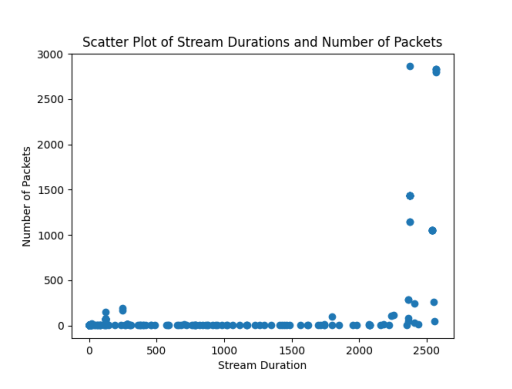

In [16]:
mirai_smart_stream.chat("Plot the scatter plot of stream durations and number of packets.")

In [17]:
print(mirai_smart_stream.last_code_executed)

def analyze_data(dfs: list[pd.DataFrame]) ->dict:
    """
    Analyze the data
    1. Prepare: Preprocessing and cleaning data if necessary
    2. Process: Manipulating data for analysis (grouping, filtering, aggregating, etc.)
    3. Analyze: Conducting the actual analysis (if the user asks to plot a chart save it to an image in exports/charts/temp_chart.png and do not show the chart.)
    4. Output: return a dictionary of:
    - type (possible values "text", "number", "dataframe", "plot")
    - value (can be a string, a dataframe or the path of the plot, NOT a dictionary)
    Example output: { "type": "text", "value": "The average loan amount is $15,000." }
    """
    df = dfs[0][['Duration', 'Number of Packets']]
    plt.scatter(df['Duration'], df['Number of Packets'])
    plt.xlabel('Stream Duration')
    plt.ylabel('Number of Packets')
    plt.title('Scatter Plot of Stream Durations and Number of Packets')
    plt.savefig('exports/charts/temp_chart.png')
    plt.close()
    retur

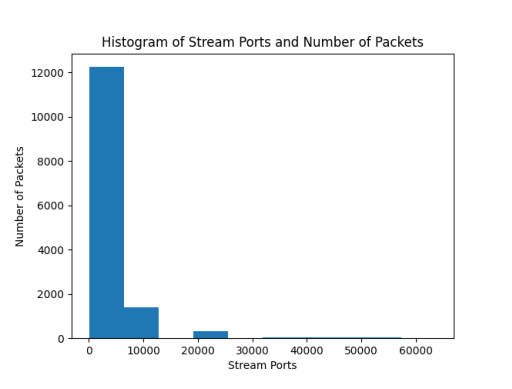

In [18]:
mirai_smart_stream.chat("Plot the histogram stream ports and number of packets.")

In [19]:
print(mirai_smart_stream.last_code_executed)

def analyze_data(dfs: list[pd.DataFrame]) ->dict:
    """
    Analyze the data
    1. Prepare: Preprocessing and cleaning data if necessary
    2. Process: Manipulating data for analysis (grouping, filtering, aggregating, etc.)
    3. Analyze: Conducting the actual analysis (if the user asks to plot a chart save it to an image in exports/charts/temp_chart.png and do not show the chart.)
    4. Output: return a dictionary of:
    - type (possible values "text", "number", "dataframe", "plot")
    - value (can be a string, a dataframe or the path of the plot, NOT a dictionary)
    Example output: { "type": "text", "value": "The average loan amount is $15,000." }
    """
    df = dfs[0]
    stream_ports = df['Destination Port']
    num_packets = df['Number of Packets']
    plt.hist(stream_ports, bins=10)
    plt.xlabel('Stream Ports')
    plt.ylabel('Number of Packets')
    plt.title('Histogram of Stream Ports and Number of Packets')
    plt.savefig('exports/charts/temp_chart.png')
    plt

# Feature Engineering

In [20]:
benign_smart = SmartDataframe(df=pd.DataFrame(benign_df), config={"llm": llm})

In [21]:
# do not rerun, this takes a while!
benign_smart_features = benign_smart.generate_features()

In [22]:
print(benign_smart.last_code_executed)

def analyze_data(dfs: list[pd.DataFrame]) ->dict:
    """
    Analyze the data
    1. Prepare: Preprocessing and cleaning data if necessary
    2. Process: Manipulating data for analysis (grouping, filtering, aggregating, etc.)
    3. Analyze: Conducting the actual analysis (if the user asks to plot a chart save it to an image in exports/charts/temp_chart.png and do not show the chart.)
    4. Output: return a dictionary of:
    - type (possible values "text", "number", "dataframe", "plot")
    - value (can be a string, a dataframe or the path of the plot, NOT a dictionary)
    Example output: { "type": "text", "value": "The average loan amount is $15,000." }
    """
    df_features = dfs[0].copy()
    df_features['Total Length'] = df_features['Payload'].apply(lambda x: len(str(x))) + df_features['Packet Length']
    df_features['Source IP Length'] = df_features['Source IP'].apply(lambda x: len(str(x)))
    df_features['Destination IP Length'] = df_features['Destination IP'].apply(lamb